In [1]:
from sktime.datasets import load_airline
from sktime.forecasting.base import ForecastingHorizon
from sktime.forecasting.model_selection import temporal_train_test_split
from sktime.forecasting.theta import ThetaForecaster
from sktime.performance_metrics.forecasting import mean_absolute_percentage_error

import matplotlib.pyplot as plt

In [2]:
y = load_airline()
y_train, y_test = temporal_train_test_split(y)
fh = ForecastingHorizon(y_test.index, is_relative=False)
forecaster = ThetaForecaster(sp=12)  # monthly seasonal periodicity
forecaster.fit(y_train)
y_pred = forecaster.predict(fh)
mean_absolute_percentage_error(y_test, y_pred)

C:\Users\roryl\.conda\envs\ofl-sktime2\lib\site-packages\sktime\datasets\_single_problem_loaders.py:714: FutureWarning: The squeeze argument has been deprecated and will be removed in a future version. Append .squeeze("columns") to the call to squeeze.


  y = pd.read_csv(path, index_col=0, squeeze=True, dtype={1: float})
C:\Users\roryl\.conda\envs\ofl-sktime2\lib\site-packages\sktime\performance_metrics\forecasting\_functions.py:1543: FutureWarning: In the percentage error metric functions the default argument symmetric=True is changing to symmetric=False in v0.12.0.
  warn(


0.08661467733492875

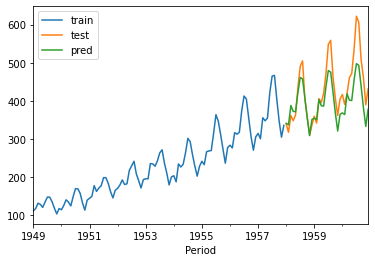

In [3]:
y_train.plot(label="train")
y_test.plot( label="test")
y_pred.plot( label="pred")
plt.legend()

In [4]:
from sktime.classification.kernel_based import RocketClassifier
from sktime.datasets import load_arrow_head
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [6]:
X, y = load_arrow_head(return_X_y=True)
X_train, X_test, y_train, y_test = train_test_split(X, y)
classifier = RocketClassifier()
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)
accuracy_score(y_test, y_pred)


0.9245283018867925

In [7]:
from sklearn.model_selection import train_test_split
from sktime.clustering.k_means import TimeSeriesKMeans
from sktime.clustering.evaluation._plot_clustering import plot_cluster_algorithm
from sktime.datasets import load_arrow_head

X, y = load_arrow_head()
X_train, X_test, y_train, y_test = train_test_split(X, y)

k_means = TimeSeriesKMeans(n_clusters=5, init_algorithm="forgy", metric="dtw")
k_means.fit(X_train)
plot_cluster_algorithm(k_means, X_test, k_means.n_clusters)

ModuleNotFoundError: No module named 'tslearn'. 'tslearn' is a soft dependency and not included in the sktime installation. Please run: `pip install tslearn` to install the tslearn package. To install all soft dependencies, run: `pip install sktime[all_extras]`